<a href="https://colab.research.google.com/github/RainaVardhan/CS4774/blob/main/cdw3pe_codeathon_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Codeathon 1: Comparison of Regression Models on Housing Prices in Ames, Iowa

### CS 4774 Machine Learning - Department of Computer Science - University of Virginia
![(Image Credit Boston.gov)](https://miro.medium.com/max/1000/1*WYZCnpM7bE3Wq4NNxx7jDA.jpeg)

In this assignment, You are in charge of building a system to predict housing prices in Ames, Iowa. You need to find the best model given the Iowa Housing dataset, and then see if you can improve its performance further by tuning its hyperparameters.  You must evaluate your model using RMSE with 5-fold cross-validation. You can use Python’s Scikit-Learn API and Google Colab to present your solution and performance to your peers.

* **DOWNLOAD**: Download from Kaggle the Iowa Housing datasetLinks to an external site. in the [Ames Housing Dataset on Kaggle](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data). You will attempt to predict the housing prices in Ames, IA. For references, you may refer to my slides or the Google Colab if you need additional sample codes to help with your assignment. To get started, you will need to upload/copy the dataset (.csv) into the same Colab workspace.

* **CODE**: Using this provided template, apply the 8 main steps of an ML project on the selected data set. Write code in a Google Colab, download as a .ipynb file and submit via GradeScope before the deadline. For deliverables, you must write code in Colab and submit the downloaded Jupyter Notebook file (.ipynb) to earn a total of 50 pts. You will gain points depending on how you perform in the following sections.

* **PRESENT** (Optional): In a later class meeting, give a lightning talk to pitch your solution in 3-5 minutes. Prepare a presentation (in Google Slides) and email me the URL to be considered (3-5 submissions will be selected to present). You will earn 10 bonus points if you are not already one of the top 10 submissions.

**BONUS POINTS:** 10 bonus points will be given (as Extra credits) for those who score among the top-10 leaderboard while following strictly the assignment guidelines. Best of luck to all!

**IMPORTANT**: You must name your submission yourUVAID_codeathon_1.ipynb








## Step 1: Big Picture and Setup
Write a paragraph explaining the context of the problem in which you are trying to investigate. Your paragraph may frame the problem and objectives by answering the following questions:
* What is the task: regression, classification, clustering, visualization?
* What to expect, how to use, and how to benefit from this model?
* What performance measure to evaluate?
* How much data is available or should be collected?
* What learning algorithm to be used?
* How much effort is to be spent?
* Verify the assumptions that have been made about the context

This project aims to predict the housing prices in Ames, Iowa, using a regression task, where the goal is to develop a model that can accurately predict housing prices based on a variety of features such as the size, age, and condition of the properties. This task involves exploring and processing the dataset, training different machine learning models, and optimizing their performance using hyperparameter tuning. The model will benefit real estate professionals, potential buyers, and market analysts by providing insights into housing prices based on the property's features, aiding in better decision-making and assessing the housing market. The performance of the model will be evaluated using the root mean squared error (RMSE) to determine how well the predicted prices match the actual values, and we will use 5-fold cross-validation to ensure that the model generalizes well and isn't overfitted to specific data subsets. We are provided with a large dataset from the Ames Housing Dataset on Kaggle, consisting of over 2,000 entries and multiple numerical and categorical features, making it suitable for model training and evaluation without the need for additional data collection. The learning algorithms to be used range from basic linear regression to more advanced algorithms like Random Forest depending on the performance of each model. Efforts will be spent on both model selection and hyperparameter tuning to ensure the best results. We assume that the dataset is representative of the Ames housing market, meaning that we don't need any supplementary data and can solely rely on this dataset to reliably predict housing prices.

## Step 2: Load the Data
We will assume that the data file is put into the same workspace on Colab. Then, you can write some code to load the CSV file and take a quick look at the dataset, and output the following:

 * How big is your dataset? (in terms of MB)
 * How many entries does it have?
 * How many features does it have?
 * Does it contain any categorical data?
 * Is there any missing values?
 * What are some basic statistics you can learn right away about this dataset?

In [121]:
import pandas as pd
import numpy as np

# To help you get started, a load function is provided below.
# You will need to fill in the code under #TODO to make it work.
def loadBostonHousingData():
  # The column names are adopted from the dataset page on Kaggle
  housing = pd.read_csv('/content/train.csv')
  return housing

housing = loadBostonHousingData()
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [122]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [123]:
import os
file_size = os.path.getsize('/content/train.csv') / (1024 * 1024)
print(f"How big is your dataset? (in terms of MB): {file_size:.2f} MB")

How big is your dataset? (in terms of MB): 0.44 MB


In [124]:
entries_count = housing.shape[0]
print(f"How many entries does it have?: {entries_count} entries")

How many entries does it have?: 1460 entries


In [125]:
features_count = housing.shape[1]
print(f"How many features does it have?: {features_count} features")

How many features does it have?: 81 features


In [126]:
categorical_columns = housing.select_dtypes(include=['object']).columns.to_list()
if len(categorical_columns) > 0:
    print(f"Does it contain any categorical data?: Yes, these columns have categorical data {categorical_columns}")
else:
    print("Does it contain any categorical data?: No it does not")

Does it contain any categorical data?: Yes, these columns have categorical data ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [127]:
missing_values_count = housing.isnull().sum().sum()
if missing_values_count > 0:
  print(f"Is there any missing values?: Yes, there are {missing_values_count} missing values")
else:
  print(f"Is there any missing values?: No there are no missing values")

Is there any missing values?: Yes, there are 7829 missing values


In [128]:
print("What are some basic statistics you can learn right away about this dataset?: I can see learn these basic stats")
housing.describe()

What are some basic statistics you can learn right away about this dataset?: I can see learn these basic stats


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


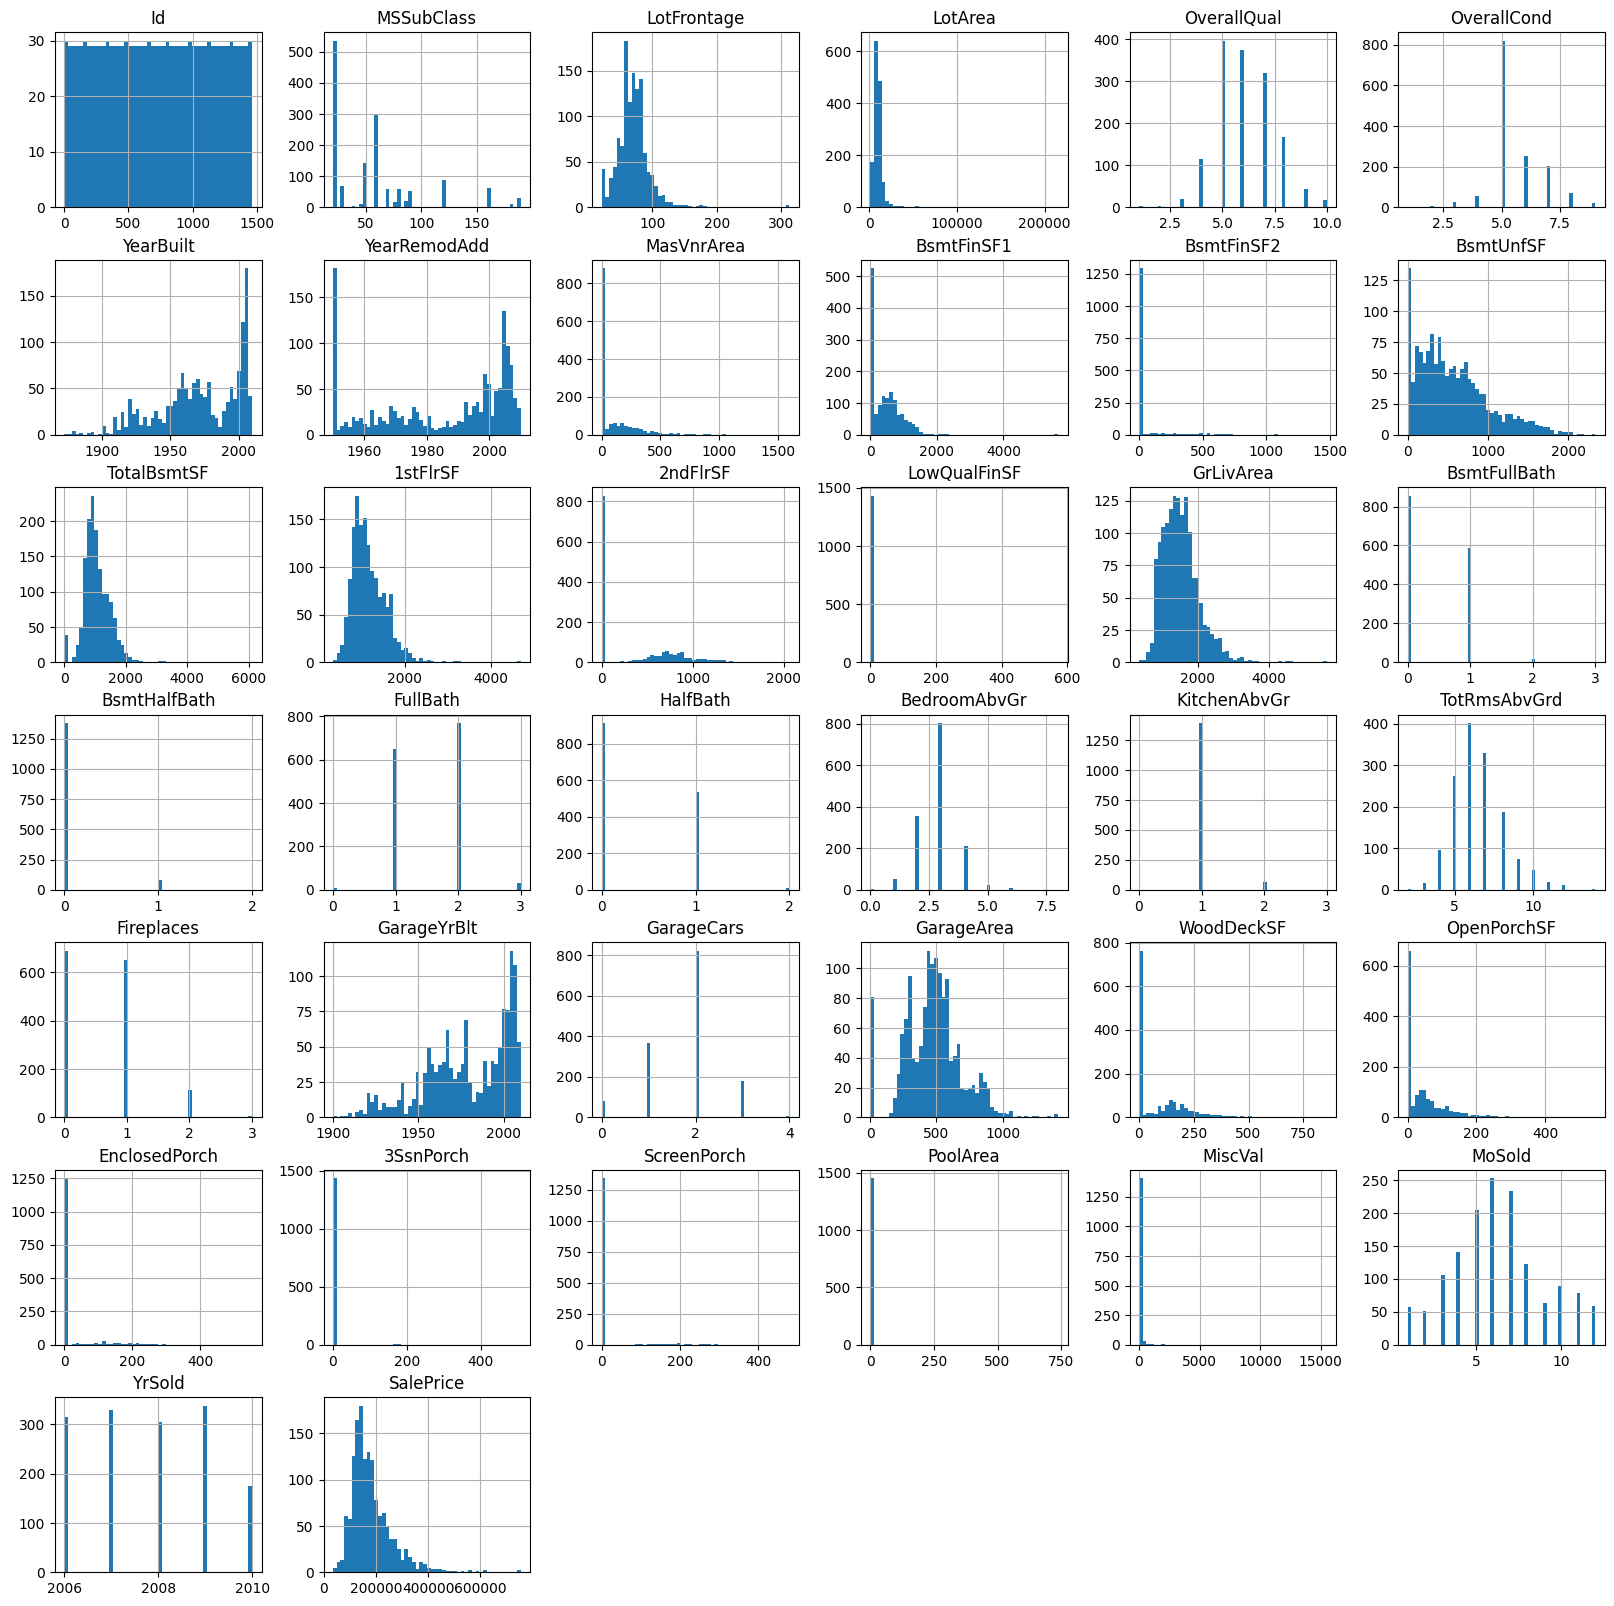

In [129]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,20))
plt.show()

In [130]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
print("Train set shape: ",train_set.shape )
print("Test set shape: ",test_set.shape )

Train set shape:  (1168, 81)
Test set shape:  (292, 81)


<Axes: >

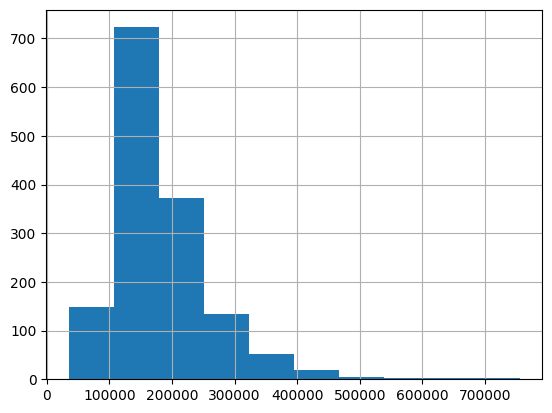

In [131]:
housing['SalePrice'].hist()

<Axes: >

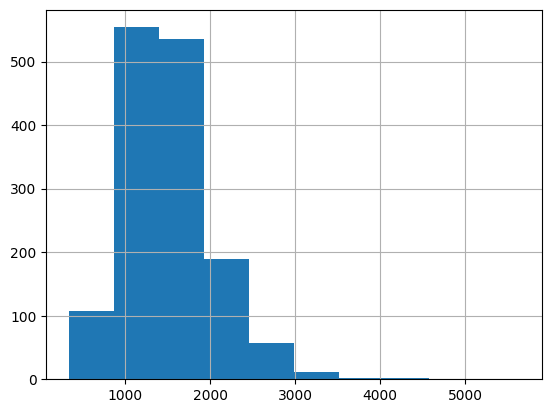

In [132]:
housing['GrLivArea'].hist()

In [133]:
housing["GrLivArea_cat"] = pd.cut(housing["GrLivArea"], bins=[0., 1500., 3000., 4500., np.inf], labels=[1, 2, 3, 4])
housing["GrLivArea_cat"].value_counts()

,count
GrLivArea_cat,
1,785
2,657
3,16
4,2


<Axes: >

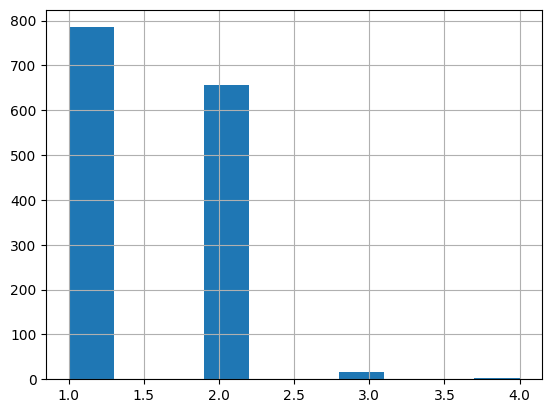

In [134]:
housing["GrLivArea_cat"].hist()

In [135]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["GrLivArea_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [136]:
strat_test_set["GrLivArea_cat"].value_counts() / len(strat_test_set)

,count
GrLivArea_cat,
1,0.537671
2,0.448630
3,0.010274
4,0.003425


In [137]:
housing["GrLivArea_cat"].value_counts() / len(housing)

,count
GrLivArea_cat,
1,0.537671
2,0.450000
3,0.010959
4,0.001370


## Step 3. Discover and visualize the data to gain insights
**Data Discovery:** Plot out all correlations among the features. You should notice some features are more correlated with your predicted value than others. This information will help you confirm the weights of your regression model later on.

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = housing.corr(numeric_only=True)
corr_matrix.shape

(38, 38)

In [139]:
corr_matrix["SalePrice"].sort_values(ascending=False)

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


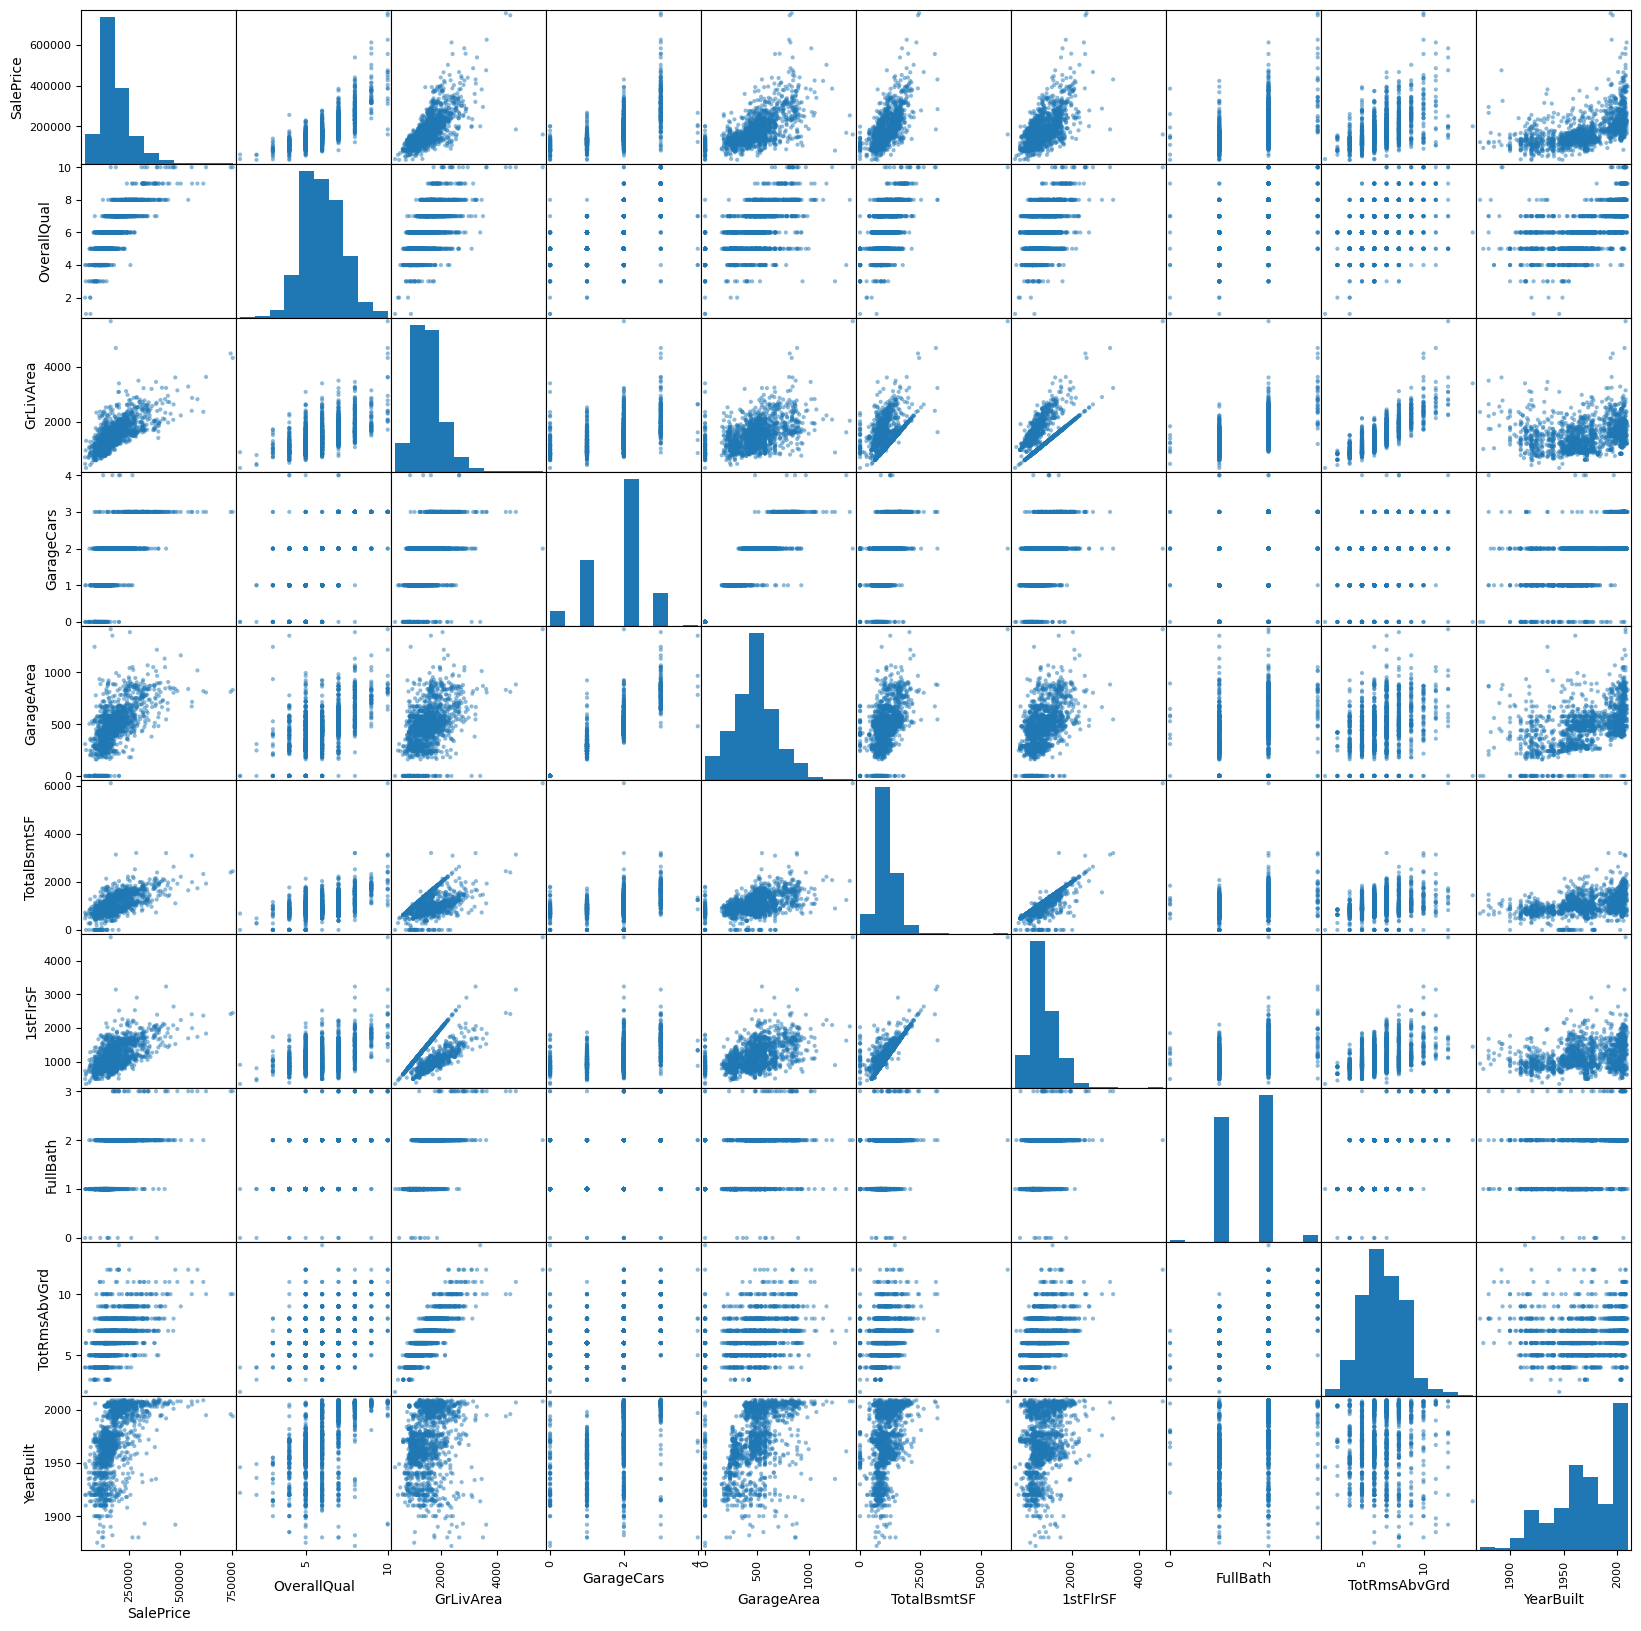

In [140]:
from pandas.plotting import scatter_matrix

attributes = corr_matrix["SalePrice"].sort_values(ascending = False).head(10).index
scatter_matrix(housing[attributes], figsize=(20,20))
plt.show()

In [141]:
housing.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

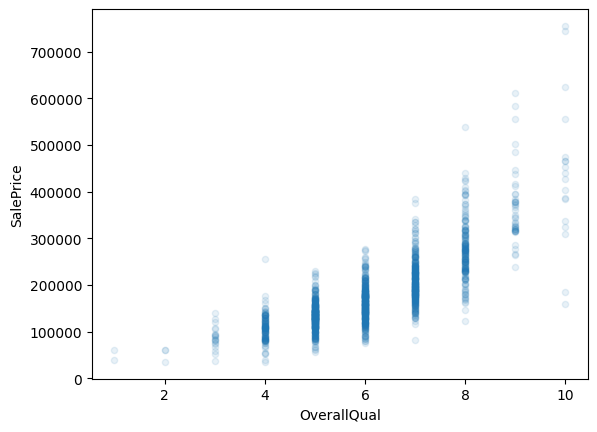

In [142]:
housing.plot(kind="scatter", x="OverallQual", y="SalePrice", alpha=0.1)
plt.show()

##  Step 4: Data Preparation and Cleaning
Since we can only use the "train.csv", you have to "artificially" split the data into training set, validation set, and test set. You may use the `train_test_split()` function *twice*: first is to split into train and test, then to split the train again into training and validation sets.

Next, you need to construct the following:

* **Data Cleaning:** If your dataset has some missing values, make sure you are able to fill those values with the `Imputer` class.

* **Feature Scaling:** Your task is to call the `StandardScaler` to normalize the value of each feature.

* **Transformation Pipeline:** More importantly, you will need to integrate the above operations into a `Pipeline` to process and transform the training data (via `fit_transform()`), then use the same pipeline to transform any validation and testing data (using `transform()` only).

In [143]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1460 non-null   int64   
 1   MSSubClass     1460 non-null   int64   
 2   MSZoning       1460 non-null   object  
 3   LotFrontage    1201 non-null   float64 
 4   LotArea        1460 non-null   int64   
 5   Street         1460 non-null   object  
 6   Alley          91 non-null     object  
 7   LotShape       1460 non-null   object  
 8   LandContour    1460 non-null   object  
 9   Utilities      1460 non-null   object  
 10  LotConfig      1460 non-null   object  
 11  LandSlope      1460 non-null   object  
 12  Neighborhood   1460 non-null   object  
 13  Condition1     1460 non-null   object  
 14  Condition2     1460 non-null   object  
 15  BldgType       1460 non-null   object  
 16  HouseStyle     1460 non-null   object  
 17  OverallQual    1460 non-null   in

In [144]:
housing = strat_train_set.drop("SalePrice", axis=1)
housing_labels = strat_train_set["SalePrice"].copy()
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,GrLivArea_cat
1196,1197,60,RL,58.0,14054,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2006,New,Partial,2
833,834,20,RL,100.0,10004,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2009,WD,Normal,2
273,274,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,4,2009,WD,Normal,2
1022,1023,50,RM,52.0,9439,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Normal,1
408,409,60,RL,109.0,14154,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,New,Partial,2


In [145]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
housing_num = housing.select_dtypes(exclude=['object', 'category'])
print(housing_num.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1168 entries, 1196 to 604
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   LotFrontage    959 non-null    float64
 3   LotArea        1168 non-null   int64  
 4   OverallQual    1168 non-null   int64  
 5   OverallCond    1168 non-null   int64  
 6   YearBuilt      1168 non-null   int64  
 7   YearRemodAdd   1168 non-null   int64  
 8   MasVnrArea     1162 non-null   float64
 9   BsmtFinSF1     1168 non-null   int64  
 10  BsmtFinSF2     1168 non-null   int64  
 11  BsmtUnfSF      1168 non-null   int64  
 12  TotalBsmtSF    1168 non-null   int64  
 13  1stFlrSF       1168 non-null   int64  
 14  2ndFlrSF       1168 non-null   int64  
 15  LowQualFinSF   1168 non-null   int64  
 16  GrLivArea      1168 non-null   int64  
 17  BsmtFullBath   1168 non-null   int64  
 18  BsmtHalfBat

In [146]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [147]:
imputer.statistics_

array([7.3550e+02, 5.0000e+01, 7.0000e+01, 9.4230e+03, 6.0000e+00,
       5.0000e+00, 1.9720e+03, 1.9940e+03, 0.0000e+00, 3.7750e+02,
       0.0000e+00, 4.9050e+02, 9.9200e+02, 1.0895e+03, 0.0000e+00,
       0.0000e+00, 1.4650e+03, 0.0000e+00, 0.0000e+00, 2.0000e+00,
       0.0000e+00, 3.0000e+00, 1.0000e+00, 6.0000e+00, 1.0000e+00,
       1.9800e+03, 2.0000e+00, 4.7200e+02, 0.0000e+00, 2.4000e+01,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       6.0000e+00, 2.0080e+03])

In [148]:
housing_num.median().values

array([7.3550e+02, 5.0000e+01, 7.0000e+01, 9.4230e+03, 6.0000e+00,
       5.0000e+00, 1.9720e+03, 1.9940e+03, 0.0000e+00, 3.7750e+02,
       0.0000e+00, 4.9050e+02, 9.9200e+02, 1.0895e+03, 0.0000e+00,
       0.0000e+00, 1.4650e+03, 0.0000e+00, 0.0000e+00, 2.0000e+00,
       0.0000e+00, 3.0000e+00, 1.0000e+00, 6.0000e+00, 1.0000e+00,
       1.9800e+03, 2.0000e+00, 4.7200e+02, 0.0000e+00, 2.4000e+01,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       6.0000e+00, 2.0080e+03])

In [149]:
X = imputer.transform(housing_num)
print(X)

[[1.197e+03 6.000e+01 5.800e+01 ... 0.000e+00 1.100e+01 2.006e+03]
 [8.340e+02 2.000e+01 1.000e+02 ... 0.000e+00 2.000e+00 2.009e+03]
 [2.740e+02 2.000e+01 8.000e+01 ... 0.000e+00 4.000e+00 2.009e+03]
 ...
 [1.357e+03 2.000e+01 7.000e+01 ... 0.000e+00 1.000e+01 2.008e+03]
 [9.460e+02 5.000e+01 9.800e+01 ... 0.000e+00 9.000e+00 2.009e+03]
 [6.050e+02 2.000e+01 8.800e+01 ... 0.000e+00 9.000e+00 2.008e+03]]


In [150]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,index=housing.index)
housing_tr.loc[sample_incomplete_rows.index.values]

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
1196,1197.0,60.0,58.0,14054.0,7.0,5.0,2006.0,2006.0,0.0,0.0,...,660.0,100.0,17.0,0.0,0.0,0.0,0.0,0.0,11.0,2006.0
833,834.0,20.0,100.0,10004.0,6.0,6.0,1964.0,1964.0,180.0,196.0,...,472.0,0.0,0.0,0.0,0.0,152.0,0.0,0.0,2.0,2009.0
273,274.0,20.0,80.0,9600.0,6.0,6.0,1958.0,1988.0,183.0,620.0,...,338.0,289.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2009.0
1022,1023.0,50.0,52.0,9439.0,5.0,5.0,1930.0,1950.0,0.0,324.0,...,160.0,0.0,0.0,192.0,0.0,0.0,0.0,0.0,3.0,2007.0
408,409.0,60.0,109.0,14154.0,7.0,5.0,2006.0,2006.0,350.0,0.0,...,947.0,192.0,62.0,0.0,0.0,0.0,0.0,0.0,8.0,2007.0


In [151]:
housing_cat = housing.select_dtypes(include=['object', 'category'])
housing_cat.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,GrLivArea_cat
1196,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Fin,TA,TA,Y,NaN,NaN,NaN,New,Partial,2
833,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,2
273,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,RFn,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal,2
1022,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,...,Unf,Fa,Fa,Y,NaN,NaN,NaN,WD,Normal,1
408,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NridgHt,Norm,...,RFn,TA,TA,Y,NaN,NaN,NaN,New,Partial,2


In [152]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[ 3.,  1., nan,  0.,  3.,  0.,  4.,  0.,  8.,  2.,  2.,  0.,  5.,
         1.,  1., 11., 13., nan,  2.,  4.,  2.,  2.,  3.,  0.,  5.,  5.,
         1.,  0.,  1.,  4.,  2.,  6.,  2.,  3.,  0.,  4.,  4.,  2., nan,
        nan, nan,  6.,  5.,  1.],
       [ 3.,  1., nan,  3.,  3.,  0.,  4.,  0., 12.,  2.,  2.,  0.,  2.,
         1.,  1.,  6., 10.,  1.,  3.,  4.,  1.,  3.,  3.,  3.,  4.,  1.,
         1.,  4.,  1.,  4.,  3.,  6., nan,  1.,  1.,  4.,  4.,  2., nan,
        nan, nan,  8.,  4.,  1.],
       [ 3.,  1., nan,  3.,  3.,  0.,  4.,  0., 12.,  1.,  2.,  0.,  2.,
         3.,  1., 12., 14.,  0.,  3.,  4.,  1.,  3.,  3.,  3.,  4.,  3.,
         1.,  2.,  1.,  4.,  3.,  2.,  2.,  1.,  1.,  4.,  4.,  2., nan,
         2., nan,  8.,  4.,  1.],
       [ 4.,  1., nan,  3.,  3.,  0.,  4.,  0., 17.,  2.,  2.,  0.,  0.,
         1.,  1., 12., 14., nan,  3.,  4.,  1.,  3.,  3.,  3.,  3.,  5.,
         1.,  2.,  1.,  0.,  3.,  6., nan,  5.,  2.,  1.,  1.,  2., nan,
        nan, nan,  8.,

In [153]:
ordinal_encoder.categories_

[array(['C (all)', 'FV', 'RH', 'RL', 'RM'], dtype=object),
 array(['Grvl', 'Pave'], dtype=object),
 array(['Grvl', 'Pave', nan], dtype=object),
 array(['IR1', 'IR2', 'IR3', 'Reg'], dtype=object),
 array(['Bnk', 'HLS', 'Low', 'Lvl'], dtype=object),
 array(['AllPub', 'NoSeWa'], dtype=object),
 array(['Corner', 'CulDSac', 'FR2', 'FR3', 'Inside'], dtype=object),
 array(['Gtl', 'Mod', 'Sev'], dtype=object),
 array(['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr',
        'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel',
        'NAmes', 'NPkVill', 'NWAmes', 'NoRidge', 'NridgHt', 'OldTown',
        'SWISU', 'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber',
        'Veenker'], dtype=object),
 array(['Artery', 'Feedr', 'Norm', 'PosA', 'PosN', 'RRAe', 'RRAn', 'RRNe',
        'RRNn'], dtype=object),
 array(['Artery', 'Feedr', 'Norm', 'PosA', 'PosN', 'RRAn', 'RRNn'],
       dtype=object),
 array(['1Fam', '2fmCon', 'Duplex', 'Twnhs', 'TwnhsE'], dtype=object),
 arr

In [154]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<1168x269 sparse matrix of type '<class 'numpy.float64'>'
	with 51392 stored elements in Compressed Sparse Row format>

In [155]:
housing_cat_1hot.toarray()

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [156]:
cat_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [157]:
cat_encoder.categories_

[array(['C (all)', 'FV', 'RH', 'RL', 'RM'], dtype=object),
 array(['Grvl', 'Pave'], dtype=object),
 array(['Grvl', 'Pave', nan], dtype=object),
 array(['IR1', 'IR2', 'IR3', 'Reg'], dtype=object),
 array(['Bnk', 'HLS', 'Low', 'Lvl'], dtype=object),
 array(['AllPub', 'NoSeWa'], dtype=object),
 array(['Corner', 'CulDSac', 'FR2', 'FR3', 'Inside'], dtype=object),
 array(['Gtl', 'Mod', 'Sev'], dtype=object),
 array(['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr',
        'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel',
        'NAmes', 'NPkVill', 'NWAmes', 'NoRidge', 'NridgHt', 'OldTown',
        'SWISU', 'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber',
        'Veenker'], dtype=object),
 array(['Artery', 'Feedr', 'Norm', 'PosA', 'PosN', 'RRAe', 'RRAn', 'RRNe',
        'RRNn'], dtype=object),
 array(['Artery', 'Feedr', 'Norm', 'PosA', 'PosN', 'RRAn', 'RRNn'],
       dtype=object),
 array(['1Fam', '2fmCon', 'Duplex', 'Twnhs', 'TwnhsE'], dtype=object),
 arr

In [158]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([('imputer', SimpleImputer(strategy="median")),('std_scaler', StandardScaler()),])

housing_num_tr = num_pipeline.fit_transform(housing_num)
housing_num_tr

array([[ 1.09741029,  0.06890036, -0.55019648, ..., -0.0846163 ,
         1.70896525, -1.35966036],
       [ 0.23036471, -0.87233501,  1.29960398, ..., -0.0846163 ,
        -1.5879044 ,  0.88656779],
       [-1.10722627, -0.87233501,  0.41874662, ..., -0.0846163 ,
        -0.8552667 ,  0.88656779],
       ...,
       [ 1.47957914, -0.87233501, -0.02168206, ..., -0.0846163 ,
         1.3426464 ,  0.13782507],
       [ 0.4978829 , -0.16640848,  1.21151824, ..., -0.0846163 ,
         0.97632755,  0.88656779],
       [-0.31661446, -0.87233501,  0.77108956, ..., -0.0846163 ,
         0.97632755,  0.13782507]])

In [159]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = list(housing_cat)


full_pipeline = ColumnTransformer([("num", num_pipeline, num_attribs), ("cat", OneHotEncoder(handle_unknown='ignore'), cat_attribs),])

housing_prepared = full_pipeline.fit_transform(housing)

In [160]:
print(housing.shape)
print(housing_prepared.shape)

(1168, 81)
(1168, 306)


In [161]:
housing_prepared

<1168x306 sparse matrix of type '<class 'numpy.float64'>'
	with 94608 stored elements in Compressed Sparse Row format>

## Step 5: Model Selection
You should use (at the minimum) the basic ML models which we’ve covered: `LinearRegression`, `DecisionTreeRegressor`, `RandomForestRegressor`. Optionally, you may go for the extra miles by doing some research and try some more advanced models (ie. `Artificial Neural Networks`). You may use `RMSE` as the performance measure.

You must use 5-fold CV on the data set to evaluate the performance of your models (following the sample codes on Colab 02).


In [162]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print(some_data_prepared)
print("Predictions:", lin_reg.predict(some_data_prepared))

  (0, 0)	1.09741028997948
  (0, 1)	0.06890036334471857
  (0, 2)	-0.5501964792644516
  (0, 3)	0.4099231013042972
  (0, 4)	0.6451425328977701
  (0, 5)	-0.5188736675504404
  (0, 6)	1.1508390365827348
  (0, 7)	1.0096794374606357
  (0, 8)	-0.5624747666632631
  (0, 9)	-0.953051079781898
  (0, 10)	-0.27829274315650543
  (0, 11)	0.6684853038142836
  (0, 12)	-0.42488061925324877
  (0, 13)	-0.7347750141156508
  (0, 14)	1.4534242341245411
  (0, 15)	-0.1246392069808707
  (0, 16)	0.6581789209628985
  (0, 17)	-0.8074358374995372
  (0, 18)	-0.2490410398106185
  (0, 19)	0.8145177656702874
  (0, 20)	1.2005039687239887
  (0, 21)	1.3619629614143811
  (0, 22)	-0.2038980523304663
  (0, 23)	1.5395406722818659
  (0, 24)	0.5945584240288541
  :	:
  (4, 175)	1.0
  (4, 178)	1.0
  (4, 182)	1.0
  (4, 188)	1.0
  (4, 195)	1.0
  (4, 202)	1.0
  (4, 209)	1.0
  (4, 212)	1.0
  (4, 217)	1.0
  (4, 223)	1.0
  (4, 228)	1.0
  (4, 232)	1.0
  (4, 240)	1.0
  (4, 243)	1.0
  (4, 248)	1.0
  (4, 255)	1.0
  (4, 262)	1.0
  (4, 268)	1.

In [163]:
print("Labels:", list(some_labels))

Labels: [219210, 167000, 139000, 87000, 280000]


In [164]:
some_data_prepared

<5x306 sparse matrix of type '<class 'numpy.float64'>'
	with 405 stored elements in Compressed Sparse Row format>

In [165]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

18435.82019005726

In [166]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

12717.035318071934

In [167]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(random_state=42)

In [168]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [169]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,scoring="neg_mean_squared_error", cv=5)
tree_rmse_scores = np.sqrt(-scores)

In [170]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [35366.5221375  34181.66698991 41014.53309499 52558.23165385
 34920.86004427]
Mean: 39608.36278410569
Standard deviation: 6915.075414433053


In [171]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,scoring="neg_mean_squared_error", cv=5)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [28569.30154282 30712.13293197 25929.77838442 85545.84166201
 66912.15688294]
Mean: 47533.842280830315
Standard deviation: 24206.571262510075


In [172]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(random_state=42)

In [173]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

11184.130696898397

In [174]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,scoring="neg_mean_squared_error", cv=5)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [23122.69862725 27820.58268278 26699.13759313 39811.49322269
 26141.94891906]
Mean: 28719.172208979602
Standard deviation: 5760.037932067735


In [175]:
scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

,0
count,10.000000
mean,42910.057727
std,33382.749790
min,22673.206639
25%,25458.920049
50%,27602.804467
75%,33582.524559
max,118059.566545


## Step 6: Model Tuning

In this step, you should attempt to use one of the provided tools for hyperparameter tuning: `GridSearchCV`, `RandomizedSearchCV` to identify the best set of hyperparameters for your model. After tweaking your models, you eventually should report the 5-fold CV RMSE of your tuned model.

In [176]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},]

forest_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,scoring='neg_mean_squared_error',return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [177]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [178]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

In [179]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

48213.57989732574 {'max_features': 2, 'n_estimators': 3}
39811.37744001342 {'max_features': 2, 'n_estimators': 10}
38608.85872316894 {'max_features': 2, 'n_estimators': 30}
44111.76373727097 {'max_features': 4, 'n_estimators': 3}
36519.73284371714 {'max_features': 4, 'n_estimators': 10}
35093.68921976676 {'max_features': 4, 'n_estimators': 30}
42690.17559497477 {'max_features': 6, 'n_estimators': 3}
35548.605621360795 {'max_features': 6, 'n_estimators': 10}
33915.14525781843 {'max_features': 6, 'n_estimators': 30}
41912.691118587594 {'max_features': 8, 'n_estimators': 3}
35455.48849988196 {'max_features': 8, 'n_estimators': 10}
32558.30392989385 {'max_features': 8, 'n_estimators': 30}
47760.879667438385 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
39609.77594438193 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
41067.40855244148 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
36379.77637994065 {'bootstrap': False, 'max_features': 3, 'n_estimators':

In [180]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.025159,0.004888,0.002925,0.000676,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-1.736851e+09,-2.639260e+09,...,-2.324549e+09,3.344260e+08,18,-6.326650e+08,-5.253955e+08,-6.377959e+08,-6.736691e+08,-6.619600e+08,-6.262971e+08,5.266849e+07
1,0.175136,0.090348,0.010293,0.002860,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-1.152756e+09,-1.767179e+09,...,-1.584946e+09,2.438744e+08,11,-3.172902e+08,-2.881728e+08,-3.633910e+08,-3.408363e+08,-3.209030e+08,-3.261187e+08,2.510326e+07
2,0.156310,0.003024,0.005881,0.000087,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-8.902085e+08,-1.767162e+09,...,-1.490644e+09,3.115933e+08,9,-2.695946e+08,-2.318174e+08,-2.881894e+08,-2.518594e+08,-2.480733e+08,-2.579068e+08,1.932650e+07
3,0.023270,0.001669,0.002648,0.000428,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-1.364088e+09,-2.087407e+09,...,-1.945848e+09,4.192946e+08,16,-7.411459e+08,-5.345111e+08,-4.300282e+08,-4.627360e+08,-5.522885e+08,-5.441419e+08,1.082761e+08
4,0.062571,0.002570,0.003381,0.000061,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-7.432400e+08,-1.501829e+09,...,-1.333691e+09,3.478601e+08,8,-4.165788e+08,-2.569057e+08,-3.085342e+08,-2.792504e+08,-2.915328e+08,-3.105604e+08,5.561512e+07
5,0.178794,0.005632,0.005984,0.000165,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-7.452185e+08,-1.337471e+09,...,-1.231567e+09,2.599033e+08,3,-3.051638e+08,-2.093178e+08,-2.374975e+08,-1.877933e+08,-2.114508e+08,-2.302446e+08,4.064171e+07
6,0.024922,0.001133,0.002741,0.000392,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-1.764002e+09,-1.835868e+09,...,-1.822451e+09,1.325767e+08,15,-4.643385e+08,-5.504370e+08,-5.060354e+08,-4.335676e+08,-3.873793e+08,-4.683515e+08,5.646349e+07
7,0.071006,0.002275,0.003588,0.000152,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-9.426724e+08,-1.466564e+09,...,-1.263703e+09,1.787284e+08,6,-2.911703e+08,-3.065493e+08,-2.922432e+08,-2.516735e+08,-2.373364e+08,-2.757946e+08,2.650918e+07
8,0.210264,0.017767,0.005991,0.000282,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-7.009988e+08,-1.198852e+09,...,-1.150237e+09,2.423875e+08,2,-2.233958e+08,-2.162600e+08,-2.348534e+08,-1.693097e+08,-2.026436e+08,-2.092925e+08,2.255502e+07
9,0.029122,0.003439,0.002634,0.000201,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-1.237955e+09,-2.027575e+09,...,-1.756674e+09,3.747228e+08,14,-4.556705e+08,-4.611664e+08,-4.524198e+08,-4.648600e+08,-4.402609e+08,-4.548755e+08,8.479566e+06


In [181]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {'n_estimators': randint(low=1, high=200),'max_features': randint(low=1, high=8),}

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f013f75d0f0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f013f75d420>},
                   random_state=42, scoring='neg_mean_squared_error')

In [182]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

32626.554317872215 {'max_features': 7, 'n_estimators': 180}
35430.71077961539 {'max_features': 5, 'n_estimators': 15}
35771.93538761499 {'max_features': 3, 'n_estimators': 72}
34425.450571597474 {'max_features': 5, 'n_estimators': 21}
32726.975690102543 {'max_features': 7, 'n_estimators': 122}
35761.324164210455 {'max_features': 3, 'n_estimators': 75}
35589.94830882184 {'max_features': 3, 'n_estimators': 88}
33345.320190142644 {'max_features': 5, 'n_estimators': 100}
35032.735037778744 {'max_features': 3, 'n_estimators': 150}
49871.692277332215 {'max_features': 5, 'n_estimators': 2}


In [183]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([5.45116698e-03, 5.89578464e-03, 1.45167849e-02, 3.07710265e-02,
       4.00103212e-02, 4.87076672e-03, 1.40895103e-02, 1.62651698e-02,
       1.83810069e-02, 2.95770649e-02, 1.89869491e-03, 8.79537917e-03,
       3.47686141e-02, 3.45731303e-02, 1.53172589e-02, 7.14012502e-04,
       4.64932742e-02, 2.62852883e-03, 1.12782511e-03, 1.34276081e-02,
       7.13284825e-03, 5.48266146e-03, 4.04608542e-04, 9.67102003e-03,
       6.39912813e-03, 1.17335240e-02, 4.61685650e-02, 5.58115050e-02,
       7.14477226e-03, 9.82372240e-03, 1.98182391e-03, 4.23736097e-04,
       1.75728376e-03, 3.48671343e-03, 3.46193843e-04, 4.62987898e-03,
       3.62476485e-03, 4.14884037e-04, 9.09712528e-04, 2.32020645e-04,
       2.84560841e-03, 2.42643599e-03, 2.05249773e-05, 1.36234718e-04,
       3.22080575e-04, 4.07517005e-04, 3.35327144e-04, 2.20680597e-03,
       6.95714328e-04, 9.46542057e-05, 2.46441386e-03, 4.01921434e-04,
       1.66674866e-03, 5.86362246e-04, 1.28588118e-03, 2.69420162e-07,
      

In [184]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.055811504975943935, 'GarageArea'),
 (0.0464932742102928, 'GrLivArea'),
 (0.04616856497109522, 'GarageCars'),
 (0.040010321215273204, 'OverallQual'),
 (0.034768614134572995, 'TotalBsmtSF'),
 (0.034573130266046706, '1stFlrSF'),
 (0.030771026544239417, 'LotArea'),
 (0.029577064903456782, 'BsmtFinSF1'),
 (0.018381006852724775, 'MasVnrArea'),
 (0.01626516975880334, 'YearRemodAdd'),
 (0.015317258944205943, '2ndFlrSF'),
 (0.014516784900220377, 'LotFrontage'),
 (0.014089510270391313, 'YearBuilt'),
 (0.013427608104094461, 'FullBath'),
 (0.011733524039062892, 'GarageYrBlt'),
 (0.009823722403136127, 'OpenPorchSF'),
 (0.00967102002980284, 'TotRmsAbvGrd'),
 (0.008795379167737592, 'BsmtUnfSF'),
 (0.007144772256582258, 'WoodDeckSF'),
 (0.007132848246722854, 'HalfBath'),
 (0.0063991281275512825, 'Fireplaces'),
 (0.005895784639112793, 'MSSubClass'),
 (0.005482661463673475, 'BedroomAbvGr'),
 (0.005451166975370071, 'Id'),
 (0.004870766722153546, 'OverallCond'),
 (0.004629878983895413, 'MoSold'),
 (0.

In [185]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("SalePrice", axis=1)
y_test = strat_test_set["SalePrice"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [186]:
final_rmse

31435.845164154252

In [187]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(y_test, final_predictions)
lin_mae

18319.613926940638

In [188]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,loc=squared_errors.mean(),scale=stats.sem(squared_errors)))

array([21981.7906453, 38642.2773966])

## Step 7: Solution Presentation
Now that you need to write a short memo of one paragraph to be read by a non-technical audience (ie. your manager/supervisor). Focus on answering the following:

* How can you pitch your solution to this project?
* What did you learn so far about the problem?
* Is there any insight moving forward to improve the solution?

The main objective of this project was to create a model that accurately predicts housing prices in Ames, Iowa. Using the provided dataset, I developed multiple regression models and fine-tuned them to optimize performance. The Random Forest model with hyperparameter tuning proved to be the best solution, achieving a root mean squared error (RMSE) of approximately $34646 on the test data, indicating a reasonably accurate prediction of housing prices. Throughout this process, I learned that certain features, such as the overall material and finish quality, the above-grade living area square footage, and the size and capacity of the garage, have the strongest correlations with housing prices, which was surprising. I also realized that testing different models is essential for comparing robustness and accuracy, helping to identify the best-performing model. Moving forward, I would further enhance the model's performance by incorporating external data, such as economic factors and current market trends, to gain a more comprehensive understanding of the factors affecting housing prices. Overall, this model provides a solid foundation for accurately predicting housing prices based on property features.

## Step 8: Model Launching, Monitoring, and Updating
You don't need to do anything for this step. However, in the real-world, this is an iterative process where you launch, monitor, and update your model (on the cloud).

In case you get stuck in any step in the process, you may find some useful information from:

 * Consult my slides and/or the textbook
 * Talk to the TA, they are available and there to help you during their office hours
 * Come talk to me or email me <nn4pj@virginia.edu> with subject starting "CS4774 Codeathon 1:...".

Best of luck and have fun!